In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Kasen chitai,1961
1,Ser,2010
2,Devil Come to Hell and Stay Where You Belong,2008
3,Things You Don't Tell...,2006
4,Regret,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

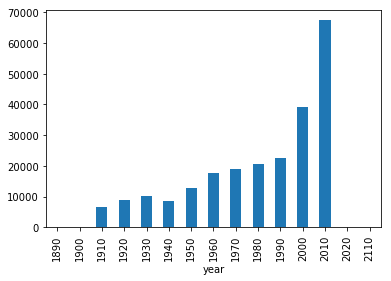

In [140]:
t_dec = titles
t_dec.groupby(t_dec.year // 10 * 10).size().plot(kind='bar')

In [79]:
help(t_dec.groupby(['title', 'year']).agg)

Help on method aggregate in module pandas.core.groupby:

aggregate(arg, *args, **kwargs) method of pandas.core.groupby.DataFrameGroupBy instance
    Aggregate using input function or dict of {column ->
    function}
    
    Parameters
    ----------
    arg : function or dict
        Function to use for aggregating groups. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply. If
        passed a dict, the keys must be DataFrame column names.
    
        Accepted Combinations are:
          - string cythonized function name
          - function
          - list of functions
          - dict of columns -> functions
          - nested dict of names -> dicts of functions
    
    Notes
    -----
    Numpy functions mean/median/prod/sum/std/var are special cased so the
    default behavior is applying the function along axis=0
    (e.g., np.mean(arr_2d, axis=0)) as opposed to
    mimicking the default Numpy behavior (e.g., np.mean(arr_2d)).
   

### Use groupby() to plot the number of "Hamlet" films made each decade.

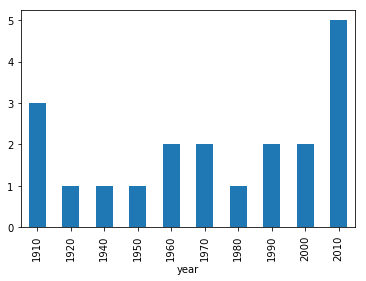

In [80]:
t_ham = titles[titles.title == 'Hamlet']
t_ham.groupby(t_ham.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [145]:
c_1950 = cast[(cast.year // 10 == 195) & (cast.n == 1)]
#c_1950.set_index('type').sort_index()
c_1950.groupby(['type', 'year']).size()

type     year
actor    1950    626
         1951    652
         1952    611
         1953    654
         1954    643
         1955    648
         1956    650
         1957    739
         1958    712
         1959    730
actress  1950    286
         1951    284
         1952    297
         1953    305
         1954    310
         1955    285
         1956    307
         1957    307
         1958    294
         1959    322
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [149]:
c_1950b = cast[(cast.year // 10 == 195) & (cast.n < 6)]
#c_1950b = c_1950b[c_1950b.n < 6]
c_1950b.groupby(['type', 'n']).size()

type     n  
actor    1.0    6665
         2.0    4599
         3.0    5623
         4.0    5635
         5.0    5652
actress  1.0    2997
         2.0    4591
         3.0    3180
         4.0    2862
         5.0    2560
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [157]:
c_pink = cast[cast.title == 'The Pink Panther']
#c_pink.groupby('year').size()
c_pink.groupby('year').n.max()

year
1963    15.0
2006    50.0
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [160]:
c_fo = cast[cast.name == 'Frank Oz']#.sort_values('title')
g_fo = c_fo.groupby(['year', 'title']).size()
g_fo[g_fo > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [132]:
c_fo2 = cast[cast.name == 'Frank Oz']
g_fo2 = c_fo2.groupby(['character']).size()
g_fo2[g_fo2 >= 2].sort_values()

character
Grover            2
Bert              3
Cookie Monster    4
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64

In [5]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [8]:
%%time
cast[cast.title == 'Sleuth']

Wall time: 417 ms


,title,year,name,type,character,n
255807,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
321493,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
321494,Sleuth,2007,Michael Caine,actor,Andrew,1.0
368025,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
368026,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1272676,Sleuth,2007,Jude Law,actor,Milo,2.0
1425445,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1441926,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1678073,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1776903,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [23]:
c = cast.set_index(['title', 'year']).sort_index()
c

name     type  \
title                   year                                     
#1 Serial Killer        2013            Michael Alton    actor   
                        2013               Aaron Aoki    actor   
                        2013        Zachary (X) Brown    actor   
                        2013           Yvis Cannavale    actor   
                        2013            Patrick Chien    actor   
                        2013          Matthias Chrans    actor   
                        2013          Robert Cicchini    actor   
                        2013           Scott Eriksson    actor   
                        2013             Rane Jameson    actor   
                        2013                   Tzi Ma    actor   
                        2013           Thomas McCurdy    actor   
                        2013     Thomas Isao Morinaka    actor   
                        2013               Parry Shen    actor   
                        2013       Eric (II) St. John    actor   
                        2013          Brian Takahashi    actor   
                        2013              Timothy Tau    actor   
                        2013              Jason Tobin    actor   
                        2013               Jesse Wang    actor   
                        2013          Romina Bovolini  actress   
                        2013            Shoshana Bush  actress   
                        2013           Kasie Callaway  actress   
                        2013               Tiley Chao  actress   
                        2013              Cindera Che  actress   
                        2013            Kylee Cochran  actress   
                        2013            Kenzie Dalton  actress   
                        2013          Christie Gaynor  actress   
                        2013            Ellen (II) Ho  actress   
                        2013                Jinxia Ma  actress   
                        2013             Gemma Massot  actress   
                        2013             Eugenia Yuan  actress   
...                                               ...      ...   
xXx: State of the Union 2005        Priscilla Hopkins  actress   
                        2005  Courtney Mykelle Howard  actress   
                        2005              Lisa Joyner  actress   
                        2005              Tia Latrell  actress   
                        2005         Danielle Lazarus  actress   
                        2005             Sunny Mabrey  actress   
                        2005               Sarah Mack  actress   
                        2005              Masuimi Max  actress   
                        2005               Gwen Mihok  actress   
                        2005             Leyna Nguyen  actress   
                        2005             Oksana Orlan  actress   
                        2005                 Lil Rhee  actress   
                        2005             Toni Russell  actress   
                        2005            Jeanne Sakata  actress   
                        2005         Deborah S. Smith  actress   
                        2005            Gina St. John  actress   
                        2005       Paola (III) Torres  actress   
                        2005           Samantha Tyler  actress   
                        2005       Gay-Yee Westerhoff  actress   
y                       2016              Jins Baskar    actor   
                        2016            Dheeraj Denny    actor   
                        2016              Yehia Kader    actor   
                        2016       Alencier Ley Lopez    actor   
                        2016          Anand Manmadhan    actor   
                        2016               Don Mathew    actor   
                        2016         Rahul (VII) Nair    actor   
                        2016             Anoop Ramesh    actor   
                        2016  Abhiram Suresh Unnithan    actor   
                       

In [30]:
%%time
c.loc[('Sleuth', 1972)]

Wall time: 125 ms


name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [32]:
c.loc[('Sleuth', 1972)].reset_index(['year', 'title'])

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [69]:
%%time
c = cast[cast.name == 'George Clooney']
c.groupby(c.year // 10 * 10).n.size()

Wall time: 277 ms


In [71]:
%%time
c_cloon = cast[cast.name == 'George Clooney']
(c_cloon.year // 10 * 10).value_counts().sort_index()

Wall time: 282 ms


In [72]:
help(c_cloon['year'].value_counts())

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.strings.StringAccessorMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be any hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN)
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  index : array-like or Index (1d)
 |      Values must be unique and hashable, same lengt